# Density Plot

Demonstrate 2-dimensional Kernel Smoothing with OpenTURNS.

Given $\alpha \in [0,1]$, we are looking for $p \in [0, 1]$ with:

$$P(X \in A(p)) = \alpha,$$

where

$$A(p)={X \in R^n \ f(x) > p}.$$

Given $\alpha$ we are looking for the threashold $p$ so that the probability to have a point density greater or equal to $p$ is $\alpha$.

In [1]:
import os
import matplotlib.pyplot as plt
import openturns as ot
from othdrplot import HighDensityRegionAlgorithm

# Configure OT
numberOfPointsForSampling=500
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetBySampling', 'true')
ot.ResourceMap.Set('Distribution-MinimumVolumeLevelSetSamplingSize', str(numberOfPointsForSampling))

fname = os.path.join(os.path.abspath(''), '../../tests/data/gauss-mixture.csv')
sample = ot.Sample.ImportFromCSVFile(fname)

In [2]:
sample

class=Sample name=/Users/roy/Documents/Playground/othdrplot/doc/examples/../../tests/data/gauss-mixture.csv implementation=class=SampleImplementation name=/Users/roy/Documents/Playground/othdrplot/doc/examples/../../tests/data/gauss-mixture.csv size=1000 dimension=2 description=[X0,X1] data=[[0.806851,-1.69008],[2.22223,-1.95101],[1.75679,-0.88062],...,[-0.144572,-1.75943],[0.812519,-2.3216],[-0.525143,2.01341]]

In [3]:
# Creation du kernel smoothing
myks = ot.KernelSmoothing()
sampleDistribution = myks.build(sample)

mydp = HighDensityRegionAlgorithm(sample,sampleDistribution)
mydp.run()

No handles with labels found to put in legend.


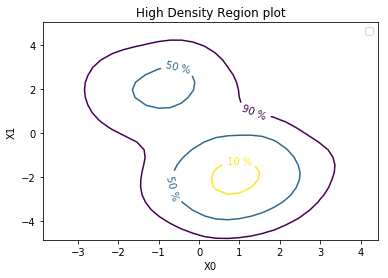

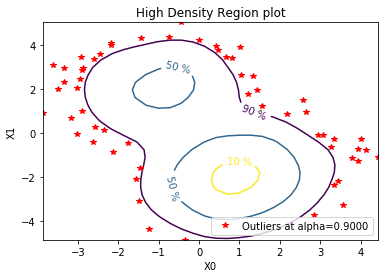

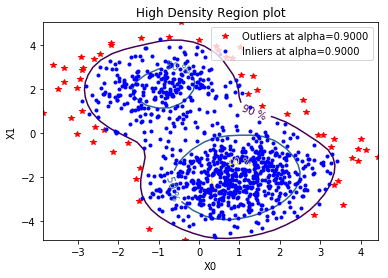

Outliers at alpha=0.9000
[ 31  60  84 105 116 121 150 151 200 207 215 218 220 248 282 284 291 359
 361 378 382 404 412 418 425 426 433 449 450 457 461 466 474 490 498 567
 587 616 634 638 652 665 687 714 729 730 748 751 794 876 894 896 903 925
 928 963 968 987]


In [4]:
# Plots

mydp.plotContour(plotData=False, plotOutliers=False)
plt.show()

mydp.plotContour(plotData=False, plotOutliers=True)
plt.show()

mydp.plotContour(plotData=True, plotOutliers=True)
plt.show()

print("Outliers at alpha=%.4f" % (mydp.outlierAlpha))
outlierIndices = mydp.computeOutlierIndices()
print(outlierIndices)